In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.model_selection import train_test_split

In [36]:
# load the data
file_path = "/Users/athamawardi/Desktop/Quiz 4 data.xlsx"
df = pd.read_excel(file_path)

In [42]:
# Let's see what data we are working on
data_types = df.dtypes

data_types


fips                         int64
STNAME                      object
CTYNAME                     object
NETMIG2018                 float64
Laborforce                 float64
Employed                   float64
Unemployed                 float64
Unemploymentrate           float64
HPI_2014_with_2000_base    float64
Metro                      float64
annualaveragetemp          float64
AvgDailyPrecipitation      float64
dtype: object

In [36]:
df.describe()

,fips,NETMIG2018,Laborforce,Employed,Unemployed,Unemploymentrate,HPI_2014_with_2000_base,Metro,annualaveragetemp,AvgDailyPrecipitation
count,3144.000000,3144.000000,3.144000e+03,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000
mean,30397.105916,311.529599,4.938529e+04,4.539968e+04,3985.607450,7.859058,131.517997,0.371538,64.618310,2.681461
std,15167.067464,2800.972843,1.595057e+05,1.452138e+05,14690.124908,2.781568,20.037611,0.483062,9.137654,0.918024
min,1001.000000,-63714.000000,6.700000e+01,6.300000e+01,4.000000,1.100000,69.630000,0.000000,41.050000,0.250000
25%,18178.500000,-92.000000,5.078500e+03,4.680500e+03,385.750000,5.900000,121.260000,0.000000,57.567500,2.060000
50%,29178.000000,8.000000,1.173250e+04,1.080750e+04,984.000000,7.700000,131.517997,0.000000,63.575000,2.820000
75%,45083.500000,227.250000,3.190225e+04,2.924025e+04,2583.750000,9.500000,137.445000,1.000000,72.472500,3.310000
max,56045.000000,59325.000000,4.915263e+06,4.378392e+06,536871.000000,27.400000,371.910000,1.000000,86.390000,7.710000


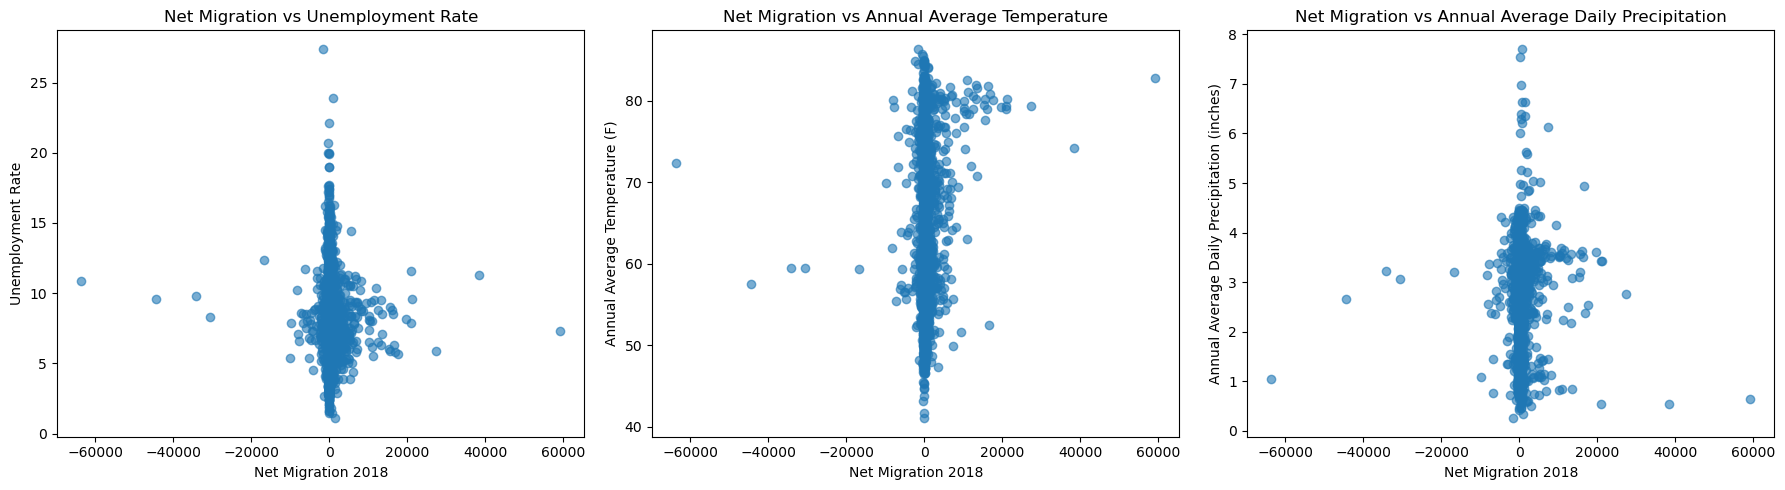

In [44]:
# Scatter plot of Net Migration and Unemployment Rate
plt.figure(figsize=(18, 5))

# Net Migration vs Unemployment Rate
plt.subplot(1, 3, 1)
plt.scatter(df['NETMIG2018'], df['Unemploymentrate'], alpha=0.6)
plt.title('Net Migration vs Unemployment Rate')
plt.xlabel('Net Migration 2018')
plt.ylabel('Unemployment Rate')

# Net Migration vs Annual Average Temperature
plt.subplot(1, 3, 2)
plt.scatter(df['NETMIG2018'], df['annualaveragetemp'], alpha=0.6)
plt.title('Net Migration vs Annual Average Temperature')
plt.xlabel('Net Migration 2018')
plt.ylabel('Annual Average Temperature (F)')

# Net Migration vs Annual Average Daily Precipitation
plt.subplot(1, 3, 3)
plt.scatter(df['NETMIG2018'], df['AvgDailyPrecipitation'], alpha=0.6)
plt.title('Net Migration vs Annual Average Daily Precipitation')
plt.xlabel('Net Migration 2018')
plt.ylabel('Annual Average Daily Precipitation (inches)')

plt.tight_layout()
plt.show()


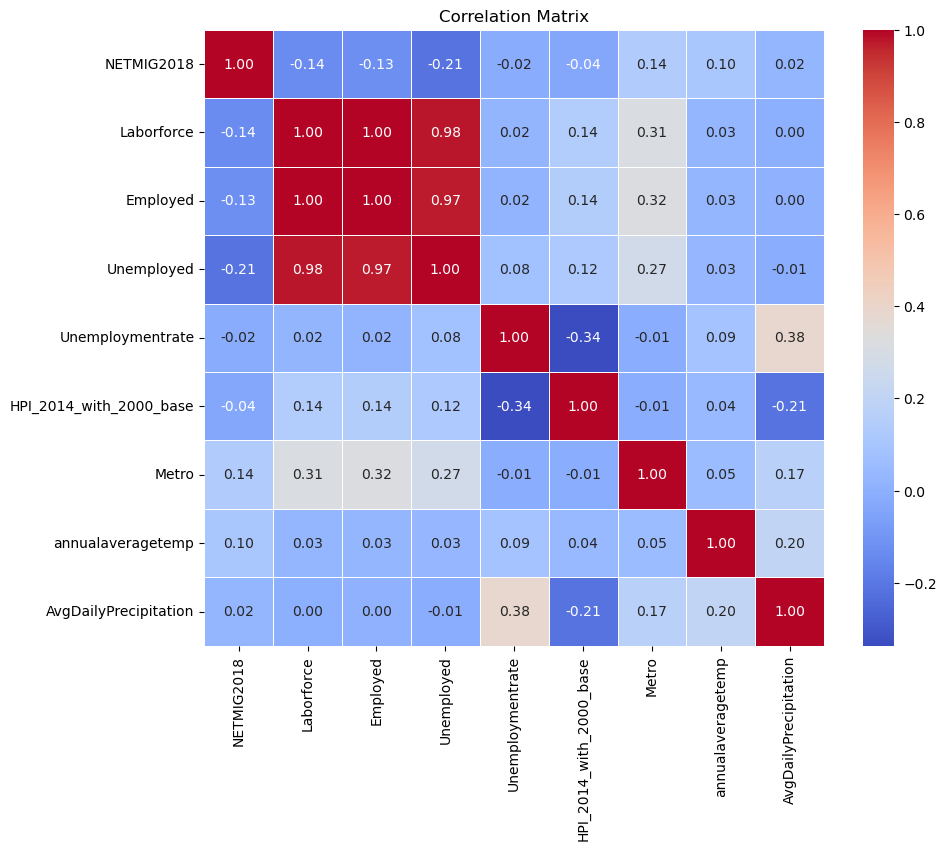

In [49]:
# Selecting relevant columns for correlation analysis
columns_to_include = ['NETMIG2018', 'Laborforce', 'Employed', 'Unemployed', 'Unemploymentrate', 
                      'HPI_2014_with_2000_base', 'Metro', 'annualaveragetemp', 'AvgDailyPrecipitation']

# Calculate the correlation matrix
correlation_matrix = df[columns_to_include].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [12]:
# Checking for missing values in the selected columns
missing_values = df[['Unemploymentrate', 'Metro', 'annualaveragetemp', 'AvgDailyPrecipitation']].isnull().sum()

missing_values


Unemploymentrate          3
Metro                     3
annualaveragetemp        37
AvgDailyPrecipitation    37
dtype: int64

We will both Impute the missing values and drop it prior the regression to see the difference between both

In [15]:
# Remove rows with missing values in the selected columns
data_cleaned = df.dropna(subset=['Unemploymentrate', 'Metro', 'annualaveragetemp', 'AvgDailyPrecipitation'])

# Define the dependent variable
Y_cleaned = data_cleaned['NETMIG2018']

# Function to perform regression analysis and return the summary
def perform_regression(X, Y):
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(Y, X).fit()
    return model.summary()

In [22]:
# Regression: Net Migration (Y) ~ Unemployment Rate (X)
X_unemployment_rate_cleaned = data_cleaned['Unemploymentrate']
regression_summary_unemployment_rate_cleaned = perform_regression(X_unemployment_rate_cleaned, Y_cleaned)
print("Regression Summary: Net Migration vs Unemployment Rate")
print(regression_summary_unemployment_rate_cleaned)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Regression Summary: Net Migration vs Unemployment Rate
                            OLS Regression Results                            
Dep. Variable:             NETMIG2018   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.108
Date:                Fri, 14 Jun 2024   Prob (F-statistic):              0.293
Time:                        17:28:45   Log-Likelihood:                -29058.
No. Observations:                3105   AIC:                         5.812e+04
Df Residuals:                    3103   BIC:                         5.813e+04
Df Model:                           1                          

In [23]:
# Regression: Net Migration (Y) ~ Metro (X)
X_metro_cleaned = data_cleaned['Metro']
regression_summary_metro_cleaned = perform_regression(X_metro_cleaned, Y_cleaned)
print("\nRegression Summary: Net Migration vs Metro")
print(regression_summary_metro_cleaned)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Regression Summary: Net Migration vs Metro
                            OLS Regression Results                            
Dep. Variable:             NETMIG2018   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     62.45
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           3.77e-15
Time:                        17:28:45   Log-Likelihood:                -29028.
No. Observations:                3105   AIC:                         5.806e+04
Df Residuals:                    3103   BIC:                         5.807e+04
Df Model:                           1                                     

In [24]:
# Regression: Net Migration (Y) ~ Annual Average Temperature (X)
X_annual_average_temp_cleaned = data_cleaned['annualaveragetemp']
regression_summary_annual_average_temp_cleaned = perform_regression(X_annual_average_temp_cleaned, Y_cleaned)
print("\nRegression Summary: Net Migration vs Annual Average Temperature")
print(regression_summary_annual_average_temp_cleaned)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Regression Summary: Net Migration vs Annual Average Temperature
                            OLS Regression Results                            
Dep. Variable:             NETMIG2018   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     32.80
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.12e-08
Time:                        17:28:46   Log-Likelihood:                -29043.
No. Observations:                3105   AIC:                         5.809e+04
Df Residuals:                    3103   BIC:                         5.810e+04
Df Model:                           1                

In [25]:
# Regression: Net Migration (Y) ~ Annual Average Daily Precipitation (X)
X_annual_daily_precipitation_cleaned = data_cleaned['AvgDailyPrecipitation']
regression_summary_annual_daily_precipitation_cleaned = perform_regression(X_annual_daily_precipitation_cleaned, Y_cleaned)
print("\nRegression Summary: Net Migration vs Annual Average Daily Precipitation")
print(regression_summary_annual_daily_precipitation_cleaned)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Regression Summary: Net Migration vs Annual Average Daily Precipitation
                            OLS Regression Results                            
Dep. Variable:             NETMIG2018   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.873
Date:                Fri, 14 Jun 2024   Prob (F-statistic):              0.171
Time:                        17:28:46   Log-Likelihood:                -29058.
No. Observations:                3105   AIC:                         5.812e+04
Df Residuals:                    3103   BIC:                         5.813e+04
Df Model:                           1        

In [18]:
# Impute missing values with the mean for the selected columns
data_imputed = df.fillna(df.mean())

# Define the dependent variable
Y_imputed = data_imputed['NETMIG2018']

# Regression: Net Migration (Y) ~ Unemployment Rate (X)
X_unemployment_rate_imputed = data_imputed['Unemploymentrate']
regression_summary_unemployment_rate_imputed = perform_regression(X_unemployment_rate_imputed, Y_imputed)
print("Regression Summary: Net Migration vs Unemployment Rate")
print(regression_summary_unemployment_rate_imputed)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Regression Summary: Net Migration vs Unemployment Rate
                            OLS Regression Results                            
Dep. Variable:             NETMIG2018   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.024
Date:                Fri, 14 Jun 2024   Prob (F-statistic):              0.312
Time:                        17:28:22   Log-Likelihood:                -29416.
No. Observations:                3144   AIC:                         5.884e+04
Df Residuals:                    3142   BIC:                         5.885e+04
Df Model:                           1                          

/var/folders/97/_t7418h90z7_plcs1h17z0vh0000gn/T/ipykernel_96584/1443517278.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_imputed = df.fillna(df.mean())


In [19]:
# Regression: Net Migration (Y) ~ Metro (X)
X_metro_imputed = data_imputed['Metro']
regression_summary_metro_imputed = perform_regression(X_metro_imputed, Y_imputed)
print("\nRegression Summary: Net Migration vs Metro")
print(regression_summary_metro_imputed)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Regression Summary: Net Migration vs Metro
                            OLS Regression Results                            
Dep. Variable:             NETMIG2018   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     61.27
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           6.76e-15
Time:                        17:28:22   Log-Likelihood:                -29386.
No. Observations:                3144   AIC:                         5.878e+04
Df Residuals:                    3142   BIC:                         5.879e+04
Df Model:                           1                                     

In [20]:
# Regression: Net Migration (Y) ~ Annual Average Temperature (X)
X_annual_average_temp_imputed = data_imputed['annualaveragetemp']
regression_summary_annual_average_temp_imputed = perform_regression(X_annual_average_temp_imputed, Y_imputed)
print("\nRegression Summary: Net Migration vs Annual Average Temperature")
print(regression_summary_annual_average_temp_imputed)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Regression Summary: Net Migration vs Annual Average Temperature
                            OLS Regression Results                            
Dep. Variable:             NETMIG2018   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     32.95
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.04e-08
Time:                        17:28:22   Log-Likelihood:                -29400.
No. Observations:                3144   AIC:                         5.880e+04
Df Residuals:                    3142   BIC:                         5.882e+04
Df Model:                           1                

In [21]:
# Regression: Net Migration (Y) ~ Annual Average Daily Precipitation (X)
X_annual_daily_precipitation_imputed = data_imputed['AvgDailyPrecipitation']
regression_summary_annual_daily_precipitation_imputed = perform_regression(X_annual_daily_precipitation_imputed, Y_imputed)
print("\nRegression Summary: Net Migration vs Annual Average Daily Precipitation")
print(regression_summary_annual_daily_precipitation_imputed)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Regression Summary: Net Migration vs Annual Average Daily Precipitation
                            OLS Regression Results                            
Dep. Variable:             NETMIG2018   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.882
Date:                Fri, 14 Jun 2024   Prob (F-statistic):              0.170
Time:                        17:28:23   Log-Likelihood:                -29416.
No. Observations:                3144   AIC:                         5.884e+04
Df Residuals:                    3142   BIC:                         5.885e+04
Df Model:                           1        

In [31]:
#### This is the stepwise regression for the data.

# Define the dependent variable
Y = data_imputed['NETMIG2018']

# Define the independent variables
X = data_imputed[['Unemploymentrate', 'Metro', 'annualaveragetemp', 'AvgDailyPrecipitation']]

# Add constant term for statsmodels
X = sm.add_constant(X)

# Perform stepwise regression using Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, Y)

# Create a dataframe to show feature ranking
ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_}).sort_values(by='Ranking')

# Perform regression with the selected features
selected_features = ranking[ranking['Ranking'] == 1]['Feature'].tolist()
X_selected = X[selected_features]
X_selected = sm.add_constant(X_selected)  # Add constant term for statsmodels

# Fit the model
stepwise_model = sm.OLS(Y, X_selected).fit()
stepwise_summary = stepwise_model.summary()

ranking, stepwise_summary


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(                 Feature  Ranking
 2                  Metro        1
 4  AvgDailyPrecipitation        2
 3      annualaveragetemp        3
 1       Unemploymentrate        4
 0                  const        5,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:             NETMIG2018   R-squared:                       0.019
 Model:                            OLS   Adj. R-squared:                  0.019
 Method:                 Least Squares   F-statistic:                     61.27
 Date:                Fri, 14 Jun 2024   Prob (F-statistic):           6.76e-15
 Time:                        17:58:21   Log-Likelihood:                -29386.
 No. Observations:                3144   AIC:                         5.878e+04
 Df Residuals:                    3142   BIC:                         5.879e+04
 Df Model:                           1                                         
 Covariance Type:  

In [38]:
###### Let's re do it manually but make it such that we don't use existing library

# Impute missing values with the mean for the selected columns
data_imputed = df.fillna(df.mean())

# Define the dependent variable
Y = data_imputed['NETMIG2018']

# Define the independent variables
X = data_imputed[['Unemploymentrate', 'Metro', 'annualaveragetemp', 'AvgDailyPrecipitation']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Function to calculate the model's AIC
def calculate_aic(X, Y):
    model = sm.OLS(Y, X).fit()
    return model.aic, model

# Stepwise Regression Function
def stepwise_regression(X, Y):
    initial_features = X.columns.tolist()
    best_features = []
    best_aic = float('inf')
    current_aic = float('inf')
    model = None
    
    while True:
        improved = False
        # Forward Selection
        for feature in initial_features:
            if feature not in best_features:
                model_features = best_features + [feature]
                X_temp = X[model_features]
                aic, temp_model = calculate_aic(X_temp, Y)
                if aic < current_aic:
                    best_aic = aic
                    best_features = model_features
                    model = temp_model
                    improved = True
        
        # Backward Elimination
        for feature in best_features:
            if feature != 'const':
                model_features = [f for f in best_features if f != feature]
                X_temp = X[model_features]
                aic, temp_model = calculate_aic(X_temp, Y)
                if aic < best_aic:
                    best_aic = aic
                    best_features = model_features
                    model = temp_model
                    improved = True
        
        if not improved:
            break
        current_aic = best_aic
    
    return best_features, model

# Perform Stepwise Regression
selected_features, final_model = stepwise_regression(X, Y)
print(f"Selected features: {selected_features}")

# Print the final model summary
print("\nFinal Model Summary:")
print(final_model.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/97/_t7418h90z7_plcs1h17z0vh0000gn/T/ipykernel_96584/4708375.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_imputed = df.fillna(df.mean())


In [41]:
###### Let's re do it but this time print 4 tests as in the task, 
# Pak Wisnu said that we need at least 4 different models
# (Still don't know what this means but i assume i
# need to make 4 combinations for 4 model to test for the best predictor)

# Impute missing values with the mean for the selected columns
data_imputed = df.fillna(df.mean())

# Define the dependent variable
Y = data_imputed['NETMIG2018']

# Define the independent variables
X = data_imputed[['Unemploymentrate', 'Metro', 'annualaveragetemp', 'AvgDailyPrecipitation']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Split the df into training and testing sets (optional, for validation purposes)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Function to fit a model and return AIC
def fit_model(X, Y):
    model = sm.OLS(Y, X).fit()
    return model, model.aic

# Stepwise Regression Function
def stepwise_regression(X, Y):
    initial_features = X.columns.tolist()
    best_features = []
    models = []

    while len(initial_features) > 0:
        aic_with_candidates = []
        
        for feature in initial_features:
            candidate_features = best_features + [feature]
            X_candidate = X[candidate_features]
            model, aic = fit_model(X_candidate, Y)
            aic_with_candidates.append((aic, candidate_features, model))
        
        aic_with_candidates.sort()
        best_aic, best_features, best_model = aic_with_candidates[0]
        models.append((best_features, best_model))
        initial_features.remove(best_features[-1])

    return models

# Perform stepwise regression
stepwise_models = stepwise_regression(X_train, Y_train)

# Print the summary for at least four different models
for i, (features, model) in enumerate(stepwise_models[:4]):
    print(f"\nModel {i+1} with features: {features}")
    print(model.summary())

    # Optionally, you can validate the model with the test set
    X_test_selected = X_test[features]
    predictions = model.predict(X_test_selected)
    print(f"\nPredictions for Model {i+1}:")
    print(predictions[:10])  # Print first 10 predictions


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/97/_t7418h90z7_plcs1h17z0vh0000gn/T/ipykernel_96584/305716007.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_imputed = df.fillna(df.mean())
